The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

     year    category  ... death_city death_country
995  2023   Chemistry  ...        NaN           NaN
996  2023   Chemistry  ...        NaN           NaN
997  2023  Literature  ...        NaN           NaN
998  2023       Peace  ...        NaN           NaN
999  2023   Economics  ...        NaN           NaN

[5 rows x 18 columns]
The most commonly awarded country is United States of America
The most commonly awarded gender is Male
    Decade  US_winner
0     1900   0.017544
1     1910   0.075000
2     1920   0.074074
3     1930   0.250000
4     1940   0.302326
5     1950   0.291667
6     1960   0.265823
7     1970   0.317308
8     1980   0.319588
9     1990   0.403846
10    2000   0.422764
11    2010   0.314050
12    2020   0.360000


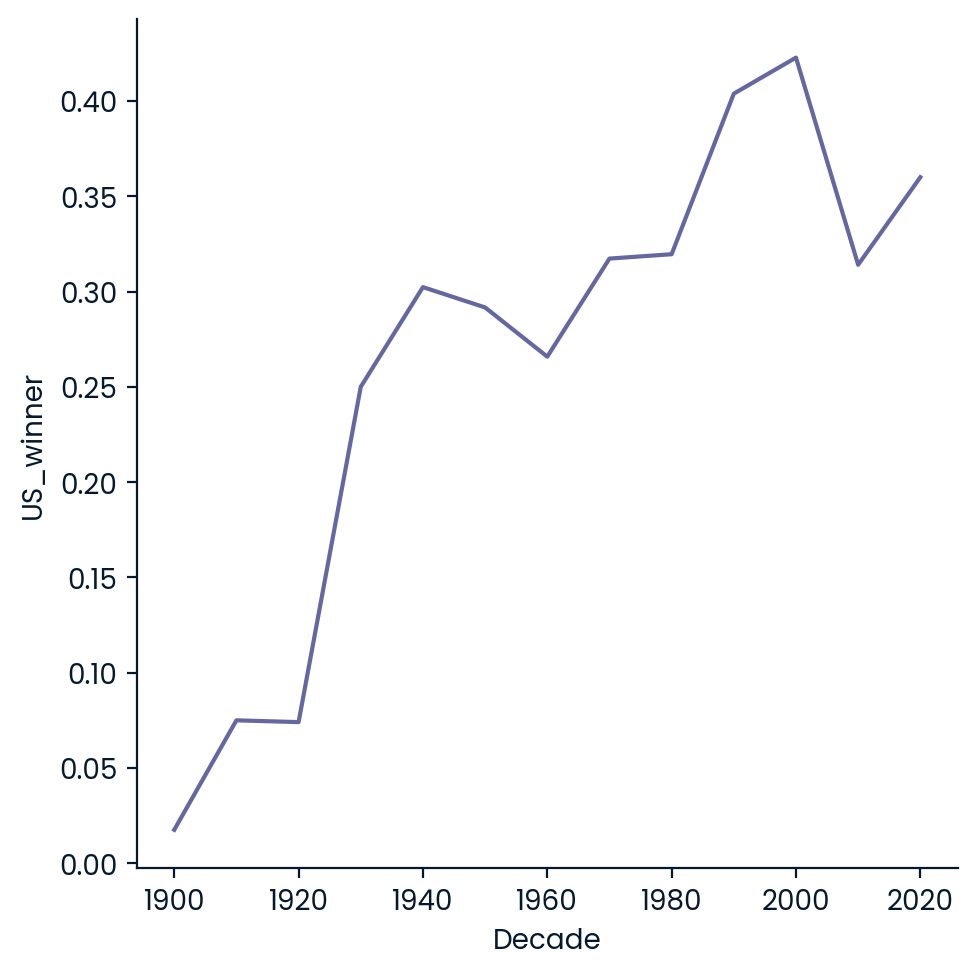

The highest decade was during the 2000s
    Decade    category    Female
0     1900   Chemistry  0.000000
1     1900  Literature  0.100000
2     1900    Medicine  0.000000
3     1900       Peace  0.071429
4     1900     Physics  0.076923
..     ...         ...       ...
67    2020   Economics  0.111111
68    2020  Literature  0.500000
69    2020    Medicine  0.125000
70    2020       Peace  0.285714
71    2020     Physics  0.166667

[72 rows x 3 columns]


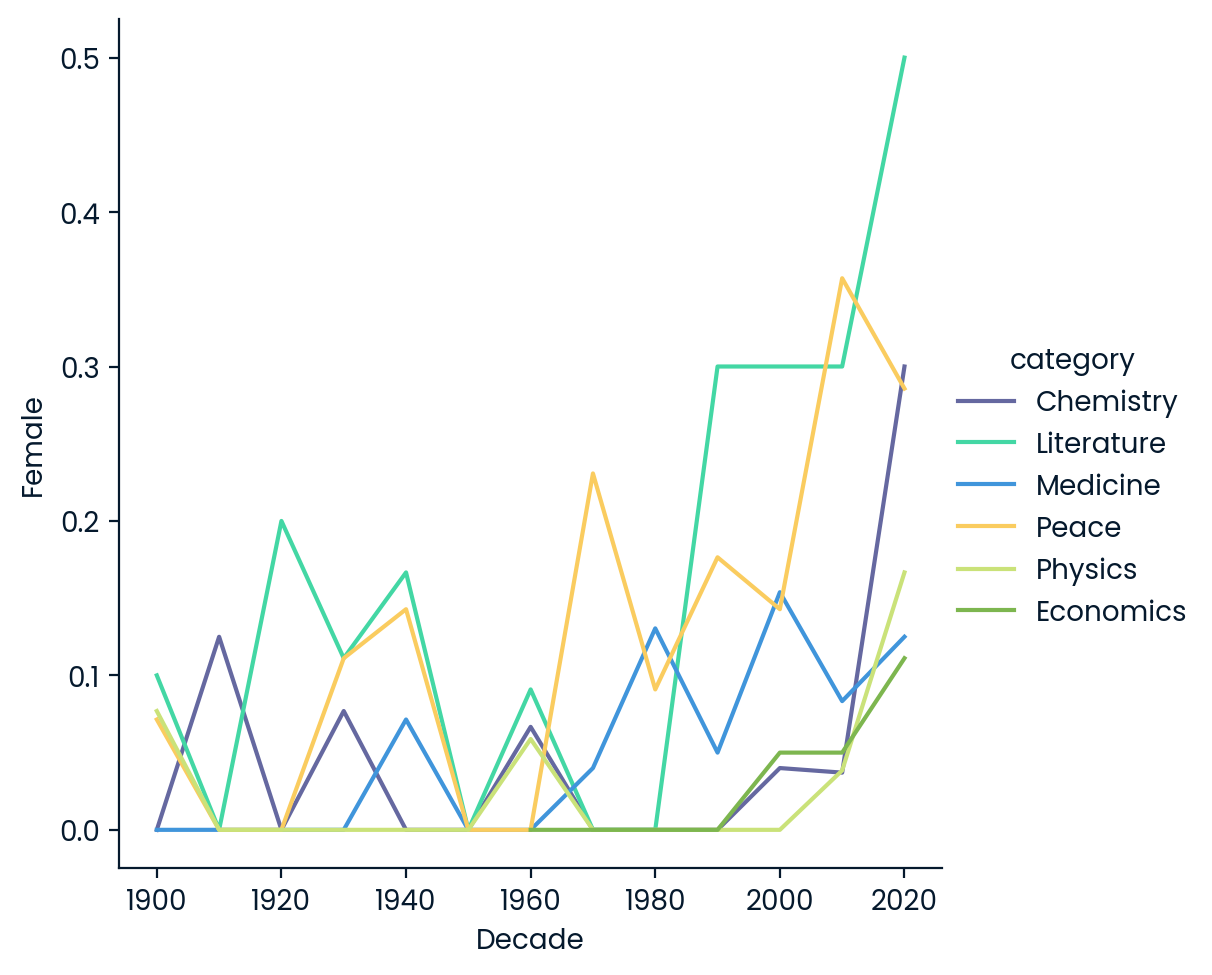

{2020: 'Literature'}
Marie Curie, née Sklodowska was the first woman to receive the Nobel prize in Physics
Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country',
       'US_winner', 'Decade', 'Female'],
      dtype='object')
   year    category  ... Decade Female
0  1901   Chemistry  ...   1900  False
1  1901  Literature  ...   1900  False
2  1901    Medicine  ...   1900  False
3  1901       Peace  ...   1900  False
4  1901       Peace  ...   1900  False

[5 rows x 21 columns]
['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Frederick Sanger', 'John Bardeen', 'Linus Carl Pauling', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


'\n\n#my way\n"not entirely correct, for the ratio\ntot_count=nob_priz.groupby("Decade")["birth_country"].count()\nus_win=nob_priz[nob_priz["US_winner"]==True]\nus_win_count=us_win.groupby("Decade")["US_winner"].count()\nprint(us_win_count/tot_count)\nprint(nob_priz["US_winner"].isnull().value_counts())\nprint("yo")\nprint(nob_priz["birth_country"].isnull().value_counts())'

In [4]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# Start coding here!
nob_priz=pd.read_csv("data/nobel.csv")
print(nob_priz.iloc[-5:])
colum=nob_priz.columns
#print(colum)

#What is the most commonly awarded gender and birth country?
top_country=nob_priz["birth_country"].value_counts().index[0]
top_gender=nob_priz["sex"].value_counts().index[0]

print(f"The most commonly awarded country is {top_country}")
print(f"The most commonly awarded gender is {top_gender}")

#Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

#add Column to show the Us winners vs. Non-Us winners
nob_priz["US_winner"]=nob_priz["birth_country"]=="United States of America"

#add column that show the decade (floor returns the floor value of the array element with a float data type)
nob_priz["Decade"]=np.floor(nob_priz["year"]/10)*10
nob_priz["Decade"]=nob_priz["Decade"].astype(int)  #convert float to int.
nob_priz_ratio=nob_priz.groupby("Decade",as_index=False)["US_winner"].mean()
print(nob_priz_ratio)

#plot the ratio over time
sns.relplot(x="Decade",y="US_winner", kind="line",data=nob_priz_ratio)
plt.show()

sort=nob_priz_ratio.sort_values("US_winner",ascending=False)
max_decade_usa=sort["Decade"].values[0]
print(f"The highest decade was during the {max_decade_usa}s")

#Which decade and Nobel Prize category combination had the highest proportion of female laureates?

nob_priz["Female"]=nob_priz["sex"]=="Female"
female_ratio_dec=nob_priz.groupby(["Decade","category"], as_index=False)["Female"].mean()

print(female_ratio_dec)

#plot the ratio over time
sns.relplot(x="Decade",y="Female", kind="line",hue="category",data=female_ratio_dec)
plt.show()

sort_female=female_ratio_dec.sort_values("Female",ascending=False)
max_female_dict={sort_female["Decade"].iloc[0]:sort_female["category"].iloc[0]}
print(max_female_dict)

#Who was the first woman to receive a Nobel Prize, and in what category?

"""
Assuming they are in order of year, if we filter only female winners, the first row will give the first result 
"""
only_female=nob_priz[nob_priz["sex"]=="Female"]

first_woman_name=only_female["full_name"].iloc[0]
first_woman_category=only_female["category"].iloc[0]
print(f"{first_woman_name} was the first woman to receive the Nobel prize in {first_woman_category}")

#Which individuals or organizations have won more than one Nobel Prize throughout the years?
print(nob_priz.columns)
t=nob_priz.groupby("full_name")["category"].count()

most_prized=t[t.values > 1]

repeat_list=most_prized.index.to_list()
print(repeat_list)




#to remember: By using "US_winner, as they suggest, even the NaN countries are taken into account". If "my way" is used, usong count on "birht county" excludes Nan (but then they are taken in the US_WINNER part)

"""

#my way
"not entirely correct, for the ratio
tot_count=nob_priz.groupby("Decade")["birth_country"].count()
us_win=nob_priz[nob_priz["US_winner"]==True]
us_win_count=us_win.groupby("Decade")["US_winner"].count()
print(us_win_count/tot_count)
print(nob_priz["US_winner"].isnull().value_counts())
print("yo")
print(nob_priz["birth_country"].isnull().value_counts())"""